In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# displays logos inline within the notebook;
# remove if using a python interpreter instead
%matplotlib inline

# logomaker import
import logomaker

import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv("../../data/abasic_sites/AbasicSitesMtDNAcontext_HLcompare.csv", sep=";").sort_values("avgH")
df

,tripletH,origtriH,countH,deepcountH,avgH,tripletL,countL,deepcountL,avgL
9,aCt,aGt,166,93,0.560241,aCt,389,213,0.547558
41,aCc,gGt,95,64,0.673684,aCc,355,173,0.487324
1,aTt,aAt,574,388,0.675958,aTt,570,289,0.507018
17,aTa,tAt,506,384,0.758893,aTa,506,226,0.446640
33,aTc,gAt,153,125,0.816993,aTc,379,171,0.451187
...,...,...,...,...,...,...,...,...,...
59,gCg,cGc,73,886,12.136986,gCg,23,156,6.782609
55,gAg,cTc,252,3306,13.119048,gAg,121,912,7.537190
14,cGt,aCg,110,1651,15.009091,cGt,69,275,3.985507
54,cAg,cTg,134,2185,16.305970,cAg,181,1239,6.845304


nuc,A,C,G,T
pos,,,,
0,0.202018,0.355978,0.190287,0.251717
1,0.146911,0.367919,0.204197,0.280973
2,0.167264,0.370119,0.407082,0.055536


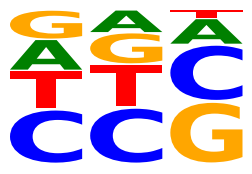

In [19]:
df_h = df[["origtriH", "avgH"]]
# df_h = df_h[df_h.avgH > df_h.avgH.mean()]

df_h[0] = df_h.origtriH.str.get(0).str.capitalize()
df_h[1] = df_h.origtriH.str.get(1).str.capitalize()
df_h[2] = df_h.origtriH.str.get(2).str.capitalize()
df_h = df_h.melt(["origtriH", "avgH"], [0, 1, 2], "pos", "nuc")

df_h_wide = df_h.groupby(["pos", "nuc"]).avgH.mean().unstack().fillna(0)
df_h_wide = (df_h_wide.T / df_h_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_h_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks([])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_h.pdf")
df_h_wide

nuc,A,C,G,T
pos,,,,
0,0.217922,0.380478,0.180225,0.221375
1,0.161136,0.326178,0.193689,0.318997
2,0.177368,0.403514,0.346768,0.072350


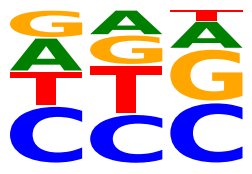

In [18]:
df_l = df[["origtriH", "avgL"]]
df_l[0] = df_l.origtriH.str.get(0).str.capitalize()
df_l[1] = df_l.origtriH.str.get(1).str.capitalize()
df_l[2] = df_l.origtriH.str.get(2).str.capitalize()
df_l = df_l.melt(["origtriH", "avgL"], [0, 1, 2], "pos", "nuc")

df_l_wide = df_l.groupby(["pos", "nuc"]).avgL.mean().unstack()
df_l_wide = (df_l_wide.T / df_l_wide.sum(axis=1)).T


# create Logo object
ss_logo = logomaker.Logo(df_l_wide,
                         width=.9,
                         vpad=.05,
                        #  fade_probabilities=True,
                         stack_order='small_on_top',
                         figsize=[3, 2],
                        #  color_scheme='dodgerblue',
                        #  font_name='Rosewood Std'
)

# style using Logo methods
ss_logo.style_spines(visible=False)

# style using Axes methods
ss_logo.ax.set_xticks(range(len(df_h_wide)))
# ss_logo.ax.set_xticklabels('%+d'%x for x in [-3, -2, -1, 1, 2, 3, 4, 5, 6])
ss_logo.ax.set_xticks([])
ss_logo.ax.set_yticks([])
# ss_logo.ax.axvline(2.5, color='k', linewidth=1, linestyle=':')
# ss_logo.ax.set_ylabel('Frequency')
plt.savefig("../../pictures/abasic_sites/triplet_logo_l.pdf")
df_l_wide